In [17]:
import matplotlib.colors as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
from re import X


class LinearRegression():

    def __init__(self, lam=1.0):
        self.lam = lam
            
    def fit(self, X, y): 

        self.X_train = X
        self.Y_train = y

        #appending the column of ones for X~ (X tilde)
        ones = np.ones((X.shape[0], 1))
        X = np.concatenate((ones, X), axis=1)      

        #w* = (X^T X)^(−1) X^T y 
        #consider instead (X^t X)w* = X^t y, np.linalg.solve() will figure out w in this equation
        a = np.dot(X.T, X)  
        b = np.dot(X.T, y)
        w = np.linalg.solve(a, b)

        self.w = w[1:].flatten()#avoid array of arrays and instead have array of ws
        self.b = w[0] 

    def printw(self): #parameters
            print(f"this is w_1..w_d: {self.w}")
            print(f"this is b: {self.b}")
            
    def predict(self, X): #model
        return self.w * X + self.b

    def MSE(self, t, tp):
        error = t - tp
        square = error ** 2
        mean = np.mean(square)
        #root = np.sqrt(mean)       
        return mean

this is w_1..w_d: [0.25912824]
this is b: [0.03147247]
This is the MSE for h and logYs 0.29853492489386185
coefficient of determination R^2 0.9911319498921859


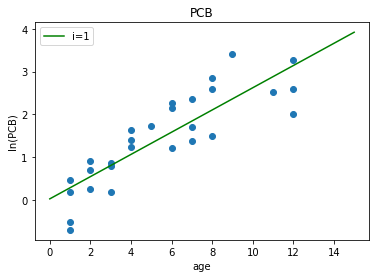

In [19]:
Data = np.loadtxt('PCB.dt')
Xs = Data[:,0].reshape((-1,1))
Ys = Data[:,1].reshape((-1,1))
logYs = np.log(Ys)

learn = LinearRegression()
learn.fit(Xs, logYs)
learn.printw()
ModelOutput = learn.predict(Xs)
print(f"This is the MSE for h and logYs {learn.MSE(logYs,ModelOutput)}")
COD = 1 - (np.mean((logYs - ModelOutput)**2)/np.mean((logYs - np.mean(Ys))**2))
print(f"coefficient of determination R^2 {COD}")

x = np.linspace(0,15,100)
y = 0.25912824*x+0.03147247
plt.title("PCB")
plt.xlabel('age')
plt.ylabel('ln(PCB)')
plt.scatter(Xs,logYs)
plt.plot(x, y, color='green', label="i=1")
plt.legend(loc=2)

this is w_1..w_d: [1.1986063]
this is b: [-1.19475082]
This is the MSE for h and logYs 1.5127796994733689
coefficient of determination R^2 0.9550625234826937


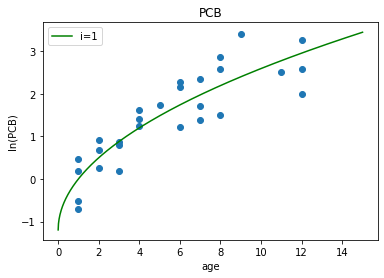

In [20]:
sqrtXs = np.sqrt(Xs)
NLLearn = LinearRegression()
NLLearn.fit(sqrtXs, logYs)
NLLearn.printw()
ModelOutput = learn.predict(sqrtXs)
print(f"This is the MSE for h and logYs {learn.MSE(logYs,ModelOutput)}")

COD = 1 - (np.mean((logYs - ModelOutput)**2)/np.mean((logYs - np.mean(Ys))**2))
print(f"coefficient of determination R^2 {COD}")

x = np.linspace(0,15,1000)
y = 1.1986063*np.sqrt(x)+-1.19475082
plt.title("PCB")
plt.xlabel('age')
plt.ylabel('ln(PCB)')
plt.scatter(Xs,logYs)
plt.plot(x, y, color='green', label="i=1")
plt.legend(loc=2)